In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 3
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (8, 5)

In [2]:
s = ct.tf('s')

#Dinâmica do sistema:
G = (1.2/((s+1)**3))

#Controlador:
C = (((1.1*(s**2)) + (2.05*s) + 1)/((0.1*(s**2)) + (2*s)))

#Dinâmica de realimentação:
H = 1

In [3]:
#Malha fechada:
sys = ct.feedback((G*C), H, -1)

sys

TransferFunction(array([1.32, 2.46, 1.2 ]), array([0.1 , 2.3 , 6.3 , 7.42, 4.46, 1.2 ]))

In [4]:
ct.poles(sys)

array([-20.03486518+0.j        ,  -0.96211249+0.23196195j,
        -0.96211249-0.23196195j,  -0.52045492+0.58364274j,
        -0.52045492-0.58364274j])

In [5]:
ct.zeros(sys)

array([-0.93181818+0.20200442j, -0.93181818-0.20200442j])

(array([[-2.00348652e+01+0.00000000e+00j, -9.62112486e-01-2.31961951e-01j,
         -9.62112486e-01+2.31961951e-01j, -5.20454923e-01-5.83642742e-01j,
         -5.20454923e-01+5.83642742e-01j],
        [-2.00348652e+01+0.00000000e+00j, -9.62112486e-01-2.31961951e-01j,
         -9.62112486e-01+2.31961951e-01j, -5.20454923e-01-5.83642742e-01j,
         -5.20454923e-01+5.83642742e-01j],
        [-2.04934405e+01+0.00000000e+00j, -9.32721225e-01-2.04090362e-01j,
         -9.32721225e-01+2.04090362e-01j, -3.20558518e-01-3.06946670e+00j,
         -3.20558518e-01+3.06946670e+00j],
        [-2.09145091e+01+0.00000000e+00j, -9.32271943e-01-2.03077303e-01j,
         -9.32271943e-01+2.03077303e-01j, -1.10473505e-01-4.24834562e+00j,
         -1.10473505e-01+4.24834562e+00j],
        [-2.13051640e+01+0.00000000e+00j, -9.32121142e-01-2.02726547e-01j,
         -9.32121142e-01+2.02726547e-01j,  8.47031452e-02-5.12737097e+00j,
          8.47031452e-02+5.12737097e+00j],
        [-2.16705424e+01+0.00000000

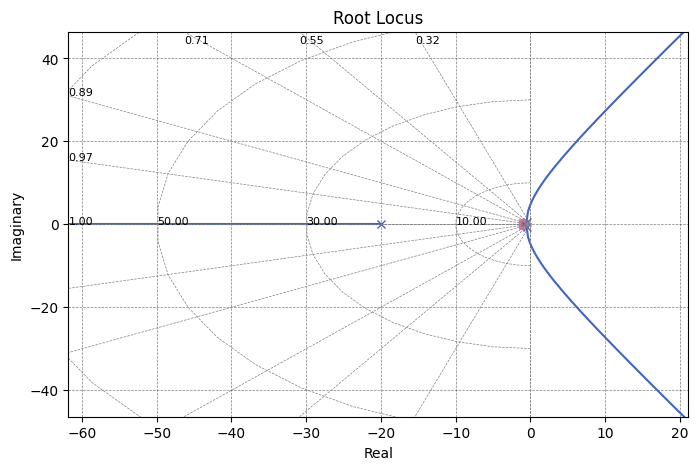

In [6]:
ct.root_locus(sys)

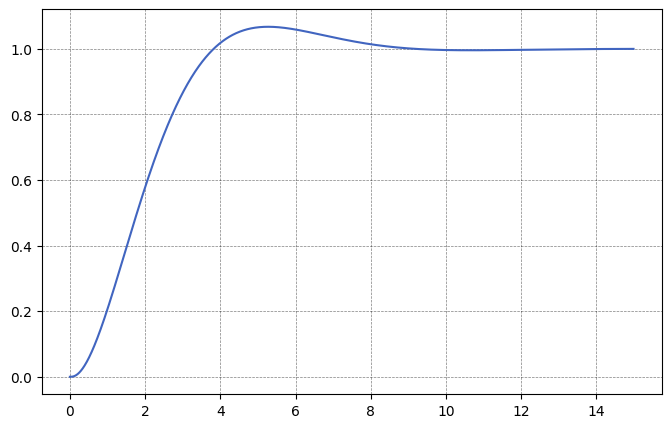

In [8]:
t = np.arange(0, 15, 1e-2)

t, y = ct.step_response(sys, t)

plt.figure(1)
plt.plot(t, y)
plt.show()